In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# path shortcut
path = r'/Users/nicolechiu/OneDrive - InterVarsity Christian Fellowship USA/Documents/CF Data Analytics/Achievement 4/05-2023 Instacart Basket Analysis'

In [3]:
# orders_products_merged dataframe creation
df_ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_task_4_8.pkl'))

<Axes: >

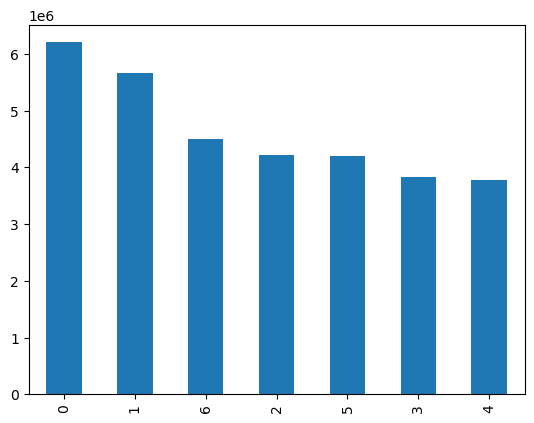

In [4]:
df_ords_prods_merged['orders_day_of_week'].value_counts().plot.bar()

<Axes: >

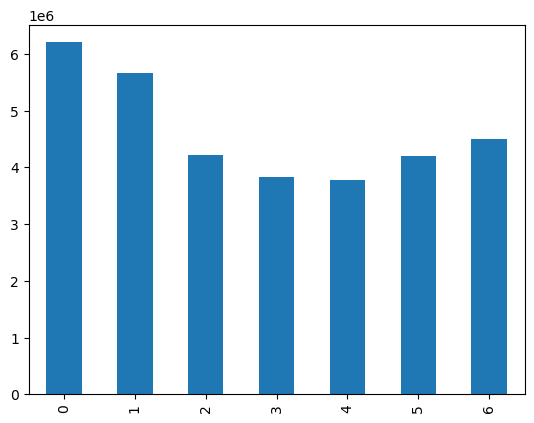

In [5]:
df_ords_prods_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [6]:
bar = df_ords_prods_merged['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'})])

SyntaxError: closing parenthesis '}' does not match opening parenthesis '[' (3375750539.py, line 1)

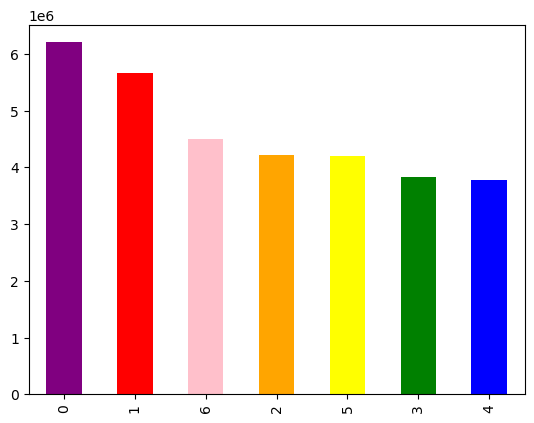

In [7]:
bar = df_ords_prods_merged['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [8]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

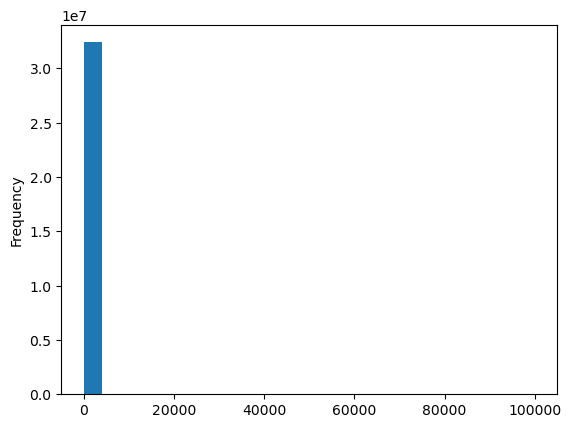

In [9]:
# Creating histogram
df_ords_prods_merged['prices'].plot.hist(bins = 25)

In [10]:
df_ords_prods_merged['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

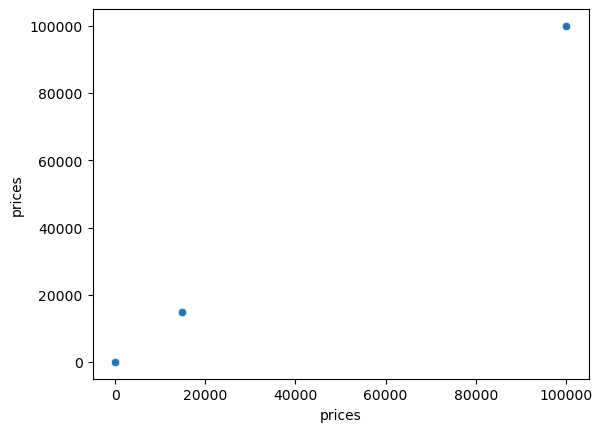

In [11]:
# Creating a scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merged)

In [12]:
df_ords_prods_merged.loc[ords_prods_merge['prices'] > 100]

NameError: name 'ords_prods_merge' is not defined

In [13]:
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_prior_order,frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequency customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,High range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,High range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,High range product,Regularly busy,Least busiest days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,High range product,Regularly busy,Least busiest days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [14]:
# Turning high priced items into NaNs
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] >100, 'prices'] = np.nan

In [15]:
# Checking max value
df_ords_prods_merged['prices'].max()

25.0

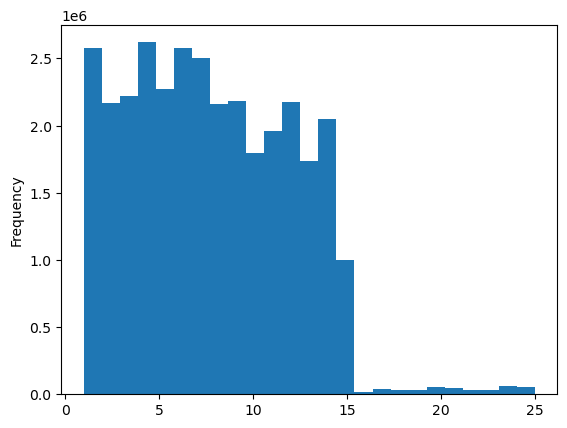

In [16]:
# Retrying histogram
hist = df_ords_prods_merged['prices'].plot.hist(bins = 25)

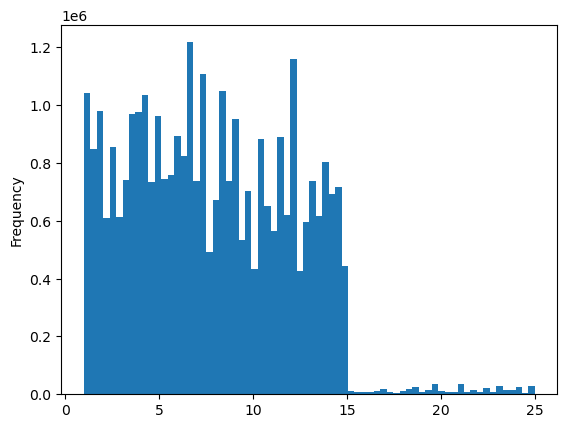

In [17]:
# Increase granularity in histogram, increase number of bins
hist_2 = df_ords_prods_merged['prices'].plot.hist(bins = 70)

In [18]:
# Exporting histogram
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [19]:
# Creating 70/30 sample
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merged)) <= 0.7

In [20]:
# Store 70% of the sample in the dataframe big
big = df_ords_prods_merged[dev]

In [21]:
# Store 30% of the sample in the dataframe small
small = df_ords_prods_merged[~dev]

In [22]:
len(df_ords_prods_merged)

32404859

In [23]:
len(big) + len(small)

32404859

In [24]:
# Reduce samples to only columns necessary for chart
df_2 = small[['orders_day_of_week','prices']]

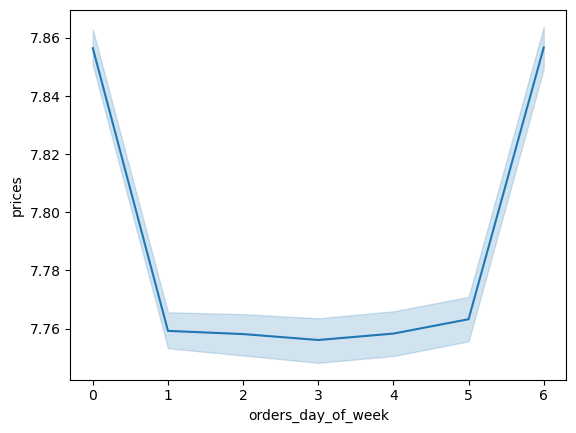

In [25]:
# Create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')